[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]]
0.9999999999996176
-144.40585108215134
1.0
-358.8506857393771
0.9896101671037343
0.9790693977615379
** ridge.coef_ **
[18.75202605  9.99048537  9.64586193 17.278557   14.42089598 12.69251285
 12.34283964 10.88252862 12.55963482 12.93825844 12.67925897  9.12136175
 12.49327194  9.02641662  8.39716922 12.21409663  8.99564455  8.85968975
 11.68602892  7.48294042  8.98610839  3.37199818 10.27381252  4.61786228
  1.60700275 11.21975321  5.66171476  2.9808368   3.17359806 11.72544455
  6.40554378  4.19129005  5.06384222  8.89201309  1.89344091  4.81186299
 -2.91832747  7.38733861 -0.51038117 -5.91335297  9.5029666   1.56464851
 -3.66645267 -6.13031213 11.06068777  3.21356622 -1.71089861 -3.65107495
 -2.63704498 11.98418393  4.3636902  -0.11776857 -1.40420516  0.45174316
  5.29453248]
** ridge.intercept_ **
400.8333333333333


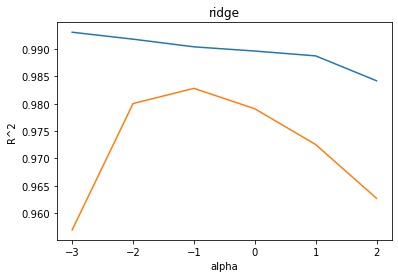

0.9903815817570368
0.9827976465386983
0.989789897208096
0.9800593698421884


C:\Users\reals\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\reals\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\reals\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.062e+02, toleranc

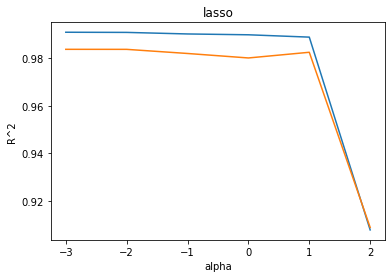

0.9888067471131867
0.9824470598706695


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


df = pd.read_csv('perch_csv_data.csv')
perch_full = df.to_numpy()

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

lr = LinearRegression()

# PolynomialFeatures : 데이터 특성 추가
# 특성 생성 방법 확인 .get_feature_names_out()
poly = PolynomialFeatures(degree=5, include_bias=False) # 2제곱까지, 계수(1) 추가 안 함
#poly.fit([[2, 3]])
#print(poly.transform([[2, 3]]))
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))


# 규제
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly) # 훈련 데이터로 한번만 fit진행. 테스트 데이터는 fit이 아닌 transform을 적용

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))


# Ridge
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

rw = ridge.coef_
print('** ridge.coef_ **')
print(rw)
rb = ridge.intercept_
print('** ridge.intercept_ **')
print(rb)

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] # 적용해볼 alpha값 리스트
for alpha in alpha_list:
    # 릿지 모델 생성
    ridge = Ridge(alpha=alpha)
    # 릿지 모델 훈련
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score) # 로그함수 적용(0.001은 -3, 0.01은 -2와 같이 만듦)
plt.plot(np.log10(alpha_list), test_score)
plt.title('ridge')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))


# Lasso
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] # 적용해볼 alpha값 리스트
for alpha in alpha_list:
    # 라쏘 모델을 생성
    lasso = Lasso(alpha=alpha)
    # 라쏘 모델을 훈련
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수 저장
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.title('lasso')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))